In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from numpy.linalg import eig
import os
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.matcher import PhraseMatcher
from sklearn.preprocessing import LabelEncoder
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import eig
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',100000)
nlp=spacy.load('en_core_web_md')
stop_words= list(pd.read_pickle('data/stop_words.pickle'))
matcher= PhraseMatcher(nlp.vocab)
le= LabelEncoder()
rf= RandomForestClassifier()
warnings.filterwarnings("ignore", category=DeprecationWarning)
n_range=(1,2)
max_df=1.
min_df=10
max_features=300
tf= TfidfVectorizer(
    ngram_range= n_range, 
    max_df= max_df, 
    min_df= min_df,
    max_features= max_features
    )

In [2]:
os.listdir('data/')

['cleaned_news_dataset.csv',
 'news_dataset_v1.csv',
 'news_dataset_v3_FE.csv',
 'stop_words.pickle',
 'test.pickle',
 'test_y.pickle',
 'train.pickle',
 'train_x_text.pickle',
 'train_y.pickle',
 'train_y_text.pickle',
 'val_x_text.pickle',
 'val_y_text.pickle']

In [3]:
data= pd.read_csv('data/news_dataset_v3_FE.csv')

train_x= pd.read_pickle('data/train.pickle')
train_y= pd.read_pickle('data/train_y.pickle')
val_x= pd.read_pickle('data/test.pickle')
val_y= pd.read_pickle('data/test_y.pickle')

train_x_text= pd.read_pickle('data/train_x_text.pickle')
val_x_text= pd.read_pickle('data/val_x_text.pickle')
train_y_text= pd.read_pickle('data/train_y_text.pickle')
val_y_text= pd.read_pickle('data/val_y_text.pickle')

In [4]:
for_test= tf.fit_transform(train_x_text)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


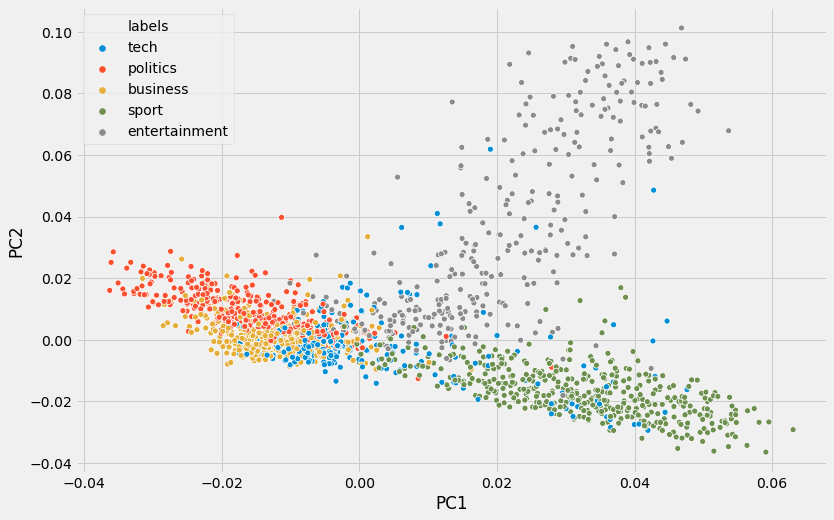

In [5]:
def eig_val(xt):
    covv= xt.T.cov()
    p_val,eig_val= eig(covv,)
    return eig_val

plt.figure(figsize=(12,8))

eig_vals= eig_val(train_x)
PCA_comp= eig_vals[:,:2]

PC1= PCA_comp[:,0]
PC2= PCA_comp[:,1]

df= pd.DataFrame({'PC1':PC1,'PC2':PC2,'labels':train_y['category']})
category= {0:'business',1:'entertainment',2:'tech',3:'politics',4:'sport'}
df['labels']= df['labels'].replace(category)

sns.scatterplot(x='PC1',y='PC2',hue='labels',data= df)
plt.legend()

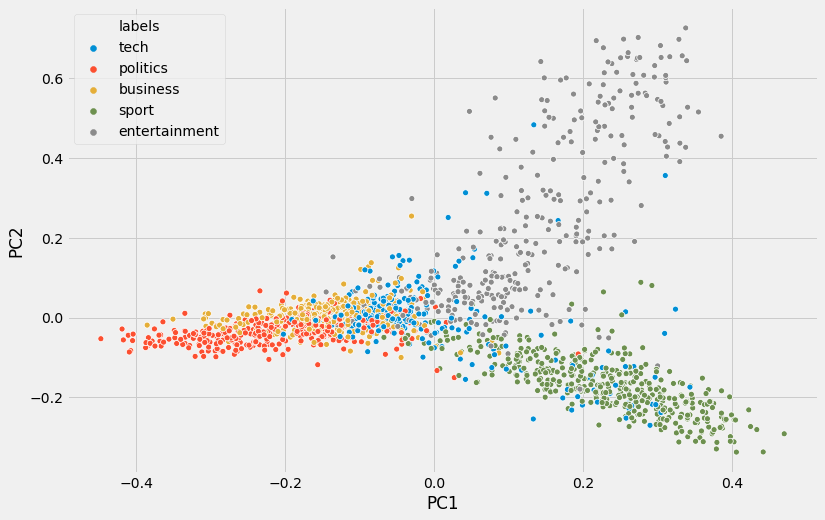

In [6]:
from sklearn.decomposition import PCA
plt.figure(figsize=(12,8))
pca= PCA(n_components=2)
v= pca.fit_transform(train_x)
v1= v[:,0]
v2= v[:,1]
df= pd.DataFrame({'PC1':v1,'PC2':v2,'labels':train_y['category']})
category= {0:'business',1:'entertainment',2:'tech',3:'politics',4:'sport'}
df['labels']= df['labels'].replace(category)

sns.scatterplot(x='PC1',y='PC2',data= df,hue='labels')

In [7]:
import pickle
with open('Models/best_rfc.pickle','rb') as output:
    model= pickle.load(output)
model

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=10,
                       n_estimators=800, random_state=8)

In [8]:
model.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=10,
                       n_estimators=800, random_state=8)

In [9]:
answer= model.predict(train_x)
accuracy_score(answer,train_y)*100

100.0

In [10]:
answer2= model.predict(val_x)
accuracy_score(answer2,val_y)*100

92.51497005988024

In [11]:
summary= pd.DataFrame({'news':val_x_text.values,'prediction':answer2,'real':val_y['category']})
summary[['prediction','real']]=summary[['prediction','real']].replace({
0:'business',                                                                  
1:'entertainment',
2:'politics',
3:'sport',
4:'tech'}) 
summary

,news,prediction,real
1691,uncap scrum half kieran uncap player include r...,sport,sport
1103,gurkhas help tsunami victim offer send company...,politics,politics
477,seal trade deal sign thaw relation country sig...,business,business
197,cairn share new oil find shares cairn energy j...,business,business
475,saudi share soar shares saudi arabia national ...,business,business
162,datum spark inflation worry wholesale price ri...,business,business
887,halloween writer debra die screenwriter produc...,entertainment,entertainment
307,french boss leave french co head european defe...,business,business
1336,join edinburgh line susan decide fit run month...,sport,sport
1679,announce june retirement captain martin announ...,sport,sport


##

business =0

entertainment=1

politics =2

sport =3

tech= 4

In [12]:
error_text= summary[summary['prediction']!= summary['real']]
error_text =error_text.reset_index()


In [13]:
num=0
display(error_text['prediction'][num])
print(error_text['news'][num])
display(error_text['real'][num])

'entertainment'

pm apology jailings tony apologise family suffer big miscarriage justice prime minister comment wrongful jail people ira bomb attack pub guildford woolwich mr sorry subject ordeal injustice apology member maguire family private room statement record television mr family deserve completely publicly exonerate family hope apology prime minister questions house commons guildford gerry wrongly convict plant bomb family delight apology mr speak sincerity add think time listen people tony heal rift help heal wound day think come follow huge campaign public apology people wrongly convict plant ira bomb kill seven people mr official spokesman present meet forget strength feel relief prime minister statement bring convict member friend family arrest family connection gerry mr father arrest travel help son die serve sentence arrest anne maguire member family mrs maguire relative plan stay good family friend wonderful feel apology weight lift shoulder people doubt believe totally innocent jail han

'politics'

In [14]:
num=1
display(error_text['prediction'][num])
print(error_text['news'][num])
display(error_text['real'][num])

'entertainment'

half life sweep award pc ﻿1 person shooter half life win awards include game online game title develope release year universal acclaim receive special praise immersive plot physic engine game win action adventure pc game art direction animation win award category race technical direction playstation game grant dean chairman game award ceremony tuesday year great year interactive entertainment industry award reflect enormous achievement progress diversity time win xbox game category prince persia warrior adjudge gamecube title sport award konami pro evolution soccer significant feature year award numb non traditional game originality award win playstation title singstar child award gamecube bongo rhythm game donkey konga handheld award colin mcrae rally mobile category win blue tooth byplanes audio award win duty finest hour hitman contracts win music award


'tech'

In [15]:
num=2
display(error_text['prediction'][num])
print(error_text['news'][num])
display(error_text['real'][num])

'business'

ethnic producer face barrier minority ethnic lead production company face barrier succeed film television industry research suggest study commission pact film council include interview industry expert individual indicate career progression lack role model main problem company research indicate independent production company minority ethnic lead minority ethnic lead company define majority decision power rest individual individual minority ethnic group report explore problem face company attempt compete film tv industry small company lack resource squeeze market big firm research recommend minority ethnic lead company benefit positive action career train business advice plus improve communication film tv sector rich diverse culture essential reflect film television arts minister estelle morris finding welcome report hope lead door open business film television industry opportunity


'entertainment'

In [16]:
num=3
display(error_text['prediction'][num])
print(error_text['news'][num])
display(error_text['real'][num])

'sport'

concert blight illness rock band force cancel concert bass player mills hospital suffer severe flu symptom band force cut short monday night cancel tuesday date mills hardly stand let play spokesman add rest hospital remainder band play short acoustic set monday tuesday gig reschedule june ticket advise retain ticket stub attend new date band spokesman review remain date day day basis base doctor advice mills obviously want clearly want play rest assure soon possible band hopeful able wednesday date add spokesman play accoustic version hit losing religion -pron- high leaving new york love arena audience monday band originally schedule play date world tour drummer bill berry collapse band tour suffer rupture aneurysm recovery leave band year late


'entertainment'

In [17]:
num=4
display(error_text['prediction'][num])
print(error_text['news'][num])
display(error_text['real'][num])

'business'

national gallery pink national gallery home great artwork big jump visitor number million visitor gallery house treasure raphael madonna pinks visit museum record rise number country 2 visit tourist attraction pleasure beach charles saumarez smith gallery director delight numb visitor door boost figure preseptember level mr saumarez smith add pedestrianisation trafalgar square gallery locate strong temporary collection lead strong performance exhibition programme el greco russian landscape age tolstoy raphael urbino rome particularly strong exceed target exceptional quality painting permanent collection huge draw public expectation today visitor high pace demand mr saumarez smith confident gallery maintain attendance important exhibition work caravaggio stubbs rubens place confident gallery set highly successful year add figure prepare association leading visitor attractions find figure boost increase european travel budget airline popular cultural tourist spot tate modern natural hist

'entertainment'

## We can see that in all cases the category is not 100% clear, since these articles contain concepts of both categories. These errors will always happen and we are not looking forward to be 100% accurate on them.

## Testing

In [20]:
with open('Models/tfidf.pickle','rb') as output:
    tf= pickle.load(output)
tf

TfidfVectorizer(max_features=300, min_df=10, ngram_range=(1, 2))

In [36]:
def category(num):
    category_codes = {
    0 :'business',
    1: 'entertainment',
    2: 'politics',
    3: 'sport',
    4: 'tech'
    }
    return category_codes[num]

def predict_from_text(text):    
    # dfframe creation
    lemmatized_text_list = []
    df = pd.DataFrame(columns=['content'])
    df.loc[0] = text
    
    df['content1']= df['content'].str.replace('\n+',' ')
    df['content1']= df['content1'].str.replace(r"\'s","")
    df['content1']= df['content1'].str.replace(r"[^A-Za-z0-9\s-]",'')
    df['content1']= df['content1'].str.replace(r"[0-9]+(['a-z']+)?",' ')
    df['content1']= df['content1'].str.replace(r'\s?(-+)\s',' ')
    df['content1']= df['content1'].str.replace(r'\s\s','')
    df['content1']= df['content1'].str.replace(r'-\w[-]\w+','')
    df['content1']= df['content1'].str.replace(r'-',' ')
    
    li=[]
    for doc in nlp.pipe(df['content1'],disable=['tagger','parser','ner','textcat'],batch_size=4):
        li.append(' '.join([token.lemma_ for token in doc if token.lemma_ not in stop_words] ))
    df['content2']= li
    
    li=[]
    for doc in nlp.pipe(df['content2'],disable=['tagger','parser','textcat'],batch_size=4):
        pattern= [ent.text for ent in doc.ents if ent.label_ in ['PERSON','GPE','ORG']]
        text= [ text for text in doc.text.split() if text not in pattern]
        li.append(' '.join(text))
        
    df['content3']= li
    
    X= tf.transform(df['content3']).toarray()
    answer=model.predict(X)
    print(answer)
    print(max(model.predict_proba(X)[0])*100)

In [37]:
text = """Disputes have already broken out within the new political alliance that is working to end 36 years of rule by the Socialist Party (PSOE) in Spain’s southern region of Andalusia.

Just hours after the far-right Vox agreed to support the Popular Party (PP)’s candidate to head the region, Juan Manuel Moreno, its demand for a specific regional department for family affairs is running into opposition from Ciudadanos (Citizens), the third party involved in the government change.

These early clashes suggest it could be difficult to export the model to other parts of Spain

The PP and the liberal Ciudadanos have reached their own governing agreement in the wake of an election that undermined the Socialists’ hold on power, but they need support from Vox’s 12 newly elected lawmakers to make it a reality.

Ciudadanos has refused point-blank to meet with Vox representatives, but the PP has struck its own parallel deal with the far right to ensure its support at the investiture debate, which will take place on January 15 and 16.

On Friday morning, Juan Marín of Ciudadanos said that there are no plans for a separate family affairs department within the government structure they have devised with their PP partners, and which does not include Vox.

The reform party has insisted that the Vox-PP deal does not affect them at all, and Ciudadanos’ national leader, Albert Rivera, said on Thursday that Vox “has had to take a step back, correct itself, and sheathe its sword,” alluding to the fact that Vox has dropped some of its most radical demands such as the deportation of 52,000 undocumented migrants.

 Vox national leader Santiago Abascal (c) and Andalusian leader Francisco Serrano (r).
Vox national leader Santiago Abascal (c) and Andalusian leader Francisco Serrano (r). REUTERS
But Vox insists on a family department, and said it will expect loyalty from the PP on this issue. Meanwhile, Ciudadanos has also warned it will not support the PP-Vox proposal to change the historical memory law for a “concord law.”

These early clashes suggest it could be difficult to export the model to other parts of Spain, where local and regional elections are scheduled to be held this year. The PP president, Pablo Casado, said on Thursday that their separate deals with Ciudadanos and Vox in Andalusia are “a preamble of what’s going to happen in May in Spain.”

The PP is anxious to win back power in regions like Valencia, the Balearic Islands, Castilla-La Mancha, Aragón and Cantabria, and to retain it in Madrid, Murcia, La Rioja and Castilla y León.

Parliamentary debate
The PSOE has already digested the fact that it is losing its hold on Spain’s most populated region. “We will conduct a responsible opposition, and remain vigilant about defending self-government and Andalusia’s presence in Spain,” said the party’s parliamentary spokesman, Mario Jiménez.

The Socialists will not be putting forward a candidate, now that the PP nominee has enough support for an absolute majority in the first round. The debates will take place on January 15 and 16, followed by a vote, said Speaker Marta Bosquet.

The sum of the PP, Ciudadanos and Vox votes is four above the 55 required for a majority. The PSOE lost 14 seats at the December 2 election, down to 33. The Podemos-backed Adelante Andalucía has 17 lawmakers.

"""
predict_from_text(text)

['politics']
70.11183914543854


In [38]:
# Entertainment

text = """
Cádiz is in style: it has just been included in The New York Times’ list of 52 Places to Go in 2019. The recognition comes on the back of acknowledgment from TripAdvisor, which last year ranked Cádiz eighth on its list of European Destinations On The Rise for 2018.

The journalist Andrew Ferren, who wrote about Cádiz for The New York Times’ list, lives in Spain himself and is no stranger to the southern province’s charms. “I am fascinated by its mix of atmospheres,” he says. “You leap from places as sophisticated and cultured as Jerez de la Frontera to wild landscapes that take your breath away, such as the beach in Bolonia or Alcornocales Park. It’s like the Wild West of southern of Spain.”

“Despite the fact that Cádiz was historically a major maritime link between America and Europe, it’s not very well known to the US public and it’s really worth a visit,” he adds. There are three main reasons why The New York Times recommends a trip to Cádiz:

Culinary delights
 Aponiente restaurant in El Puerto de Santa María.
Aponiente restaurant in El Puerto de Santa María.
Suggestions include the new Western-style gastrobar Saja River, recently opened on Santa Elena street, and Código de Barra in La Candelaria Square. Ferren also suggests crossing the bay from the capital to Puerto de Santa María, where Angel León has his three-starred Michelin restaurant offering “a lyrical poem of seafood.” Just 40 km from here, León has another restaurant within the Meliá Sancti Petri hotel called Alevante, which has just been awarded its first Michelin star. For something more casual, there is La Taberna del Chef del Mar, another of the chef’s brands in El Puerto.

To these suggestions, EL VIAJERO adds several of its own, including Restaurante Café Royalty, which opened opened in 1912, and the bookshop café La Clandestina (José del Toro, 23), which serves scrumptious breakfasts. There is also La Candela (Feduchy, 13) for tapas, while an exquisite combo of Andalusian and Norwegian fare is served at Patría restaurant, located on the hillside of Muela in Vejer de la Frontera.

Jerez de la Frontera and its wineries
 Bodegas Lustau, en Jerez de la Frontera (Cádiz).ampliar foto
Bodegas Lustau, en Jerez de la Frontera (Cádiz). NEIL FARRIN GETTY IMAGES
Around 36 km to the north of Cádiz lies Jerez de la Frontera, known for the fortified wines known in English as sherry. Wineries from the region known as Marco de Jerez (comprising Jerez proper, El Puerto and Sanlúcar) preserve their unique 18th and 19th-century atmosphere. Ferren recommends Díez-Mérito, Lustau and Bodegas Tradición. Foodies are told to seek out Lú in Jerez, owned by the chef JuanLu Fernández

The NMAC Montenmedio Foundation
 Vejer de la Frontera.ampliar foto
Vejer de la Frontera. GETTY IMAGES
The NMAC Montenmedio Foundation of contemporary art sits between Barbate and Vejer de la Frontera. It is a private gallery exhibiting works by artists who are asked to come up with projects inspired by the local history and landscape. The center has work by Olafur Eliasson, James Turrell, Marina Abramovic, Pascale Marthine Tayou, Maurizio Cattelan and Santiago Sierra.

EL VIAJERO expands on Ferren’s recommendations with a few of its own:

1.The Cádiz Carnival
 The Cádiz carnival.ampliar foto
The Cádiz carnival.
An unique and fun festival that takes place from February 28 to March 10. In fact it is so unique that it is applying to be included on the World Intangible Cultural Heritage list.

2. Barrio del Pópulo
 The Pópulo neighborhood.ampliar foto
The Pópulo neighborhood. RAQUEL M. CARBONELL GETTY
This is the oldest neighborhood in Cádiz and features an old Roman theater, the old cathedral and stone arches that lead to bohemian bars such as Pay Pay (Silencio, 1), a former brothel that now has live music, dance, improv and stand-up comedy.

3. Cádiz à la Havana
 Cathedral square in Cádiz.ampliar foto
Cathedral square in Cádiz. RAQUEL M. CARBONELL GETTY
Stroll from the colonial-style Mina Square, with its ficus and palm trees, to the Provincial Museum containing Phoenician sarcophagi, to Campo del Sur avenue which was converted into a Havana esplanade for the 2002 James Bond movie Die Another Day.

4. A wealth of history
 Baelo Claudia Roman site in Tarifa (Cádiz).ampliar foto
Baelo Claudia Roman site in Tarifa (Cádiz). KEN WELSH GETTY
Standing on the frontier between two continents, the province of Cádiz has a long and action-packed history, while its capital is one of the oldest cities in Europe. Remnants of yesteryear can be seen at a number of archeological sites, including Baelo Claudia, Carteia and Doña Blanca.

5. Sanlúcar de Barrameda
 Summer beach horse races in Sanlúcar de Barrameda.ampliar foto
Summer beach horse races in Sanlúcar de Barrameda. JUAN CARLOS TORO
Famous for its summer horse racing on the beach as well as for its wineries, this coastal town has been described by journalist Mariló García as a “dazzling city in Cádiz that boasts history, exquisite seafood, a city center with a mix of palaces and wineries as well as the incomparable landscape of Doñana Natural Park.”

6. Coast and mountains
 Olvera, a white village in Cádiz.ampliar foto
Olvera, a white village in Cádiz. RUDI SEBASTIAN GETTY
Cádiz has miles of windswept beaches that make it a perfect haunt for surfers of various descriptions. In less than an hour, however, you can be in the hills visiting quintessentially Andalusian white villages such as Medina Sidonia, Grazalema and Ubrique.

7. The flamenco route
Located in San Fernando, the Peña Flamenca Camarón de la Isla, named after the famous singer, has shows every week and is a good place to tune into some authentic flamenco artistry.

8. Conil de la Frontera
 The beach in Conil de la Frontera.ampliar foto
The beach in Conil de la Frontera. GETTY IMAGES
There are three national parks that stretch along Cádiz’s Atlantic coast – La Breña, Los Alcornocales and el Estrecho – as well as beaches such as Conil de la Frontera which has the best beach bars around for watching the sun go down.

9. Surfing in Tarifa
In the inlets of Los Lances and Valdevaqueros in Tarifa, wind and kitesurfers can skid across the water with a view of Africa in front and El Estrecho national park behind them.

10. The white villages
Nineteen districts in the Cádiz mountains take you through a string of white villages – Alcalá del Valle, Algar, Algodonales, Arcos de la Frontera, Benaocaz, Bornos, El Bosque, Espera, El Gastor, Grazalema, Olvera, Prado del Rey, Puerto Serrano, Setenil de las Bodegas, Torre Alhaquine, Ubrique, Villaluenga del Rosario, Villamartín and Zahara de la Sierra. The villagers still whitewash their homes with lime as they did in the past, normally once a year before the local fiestas.

"""
predict_from_text(text)

['entertainment']
67.9535938140796


In [39]:
# Business

text = """
Vodafone España has informed representatives of its employees that it is putting a collective dismissal plan into action that will affect a maximum of 1,200 workers, 24% of its total workforce in Spain of 5,000 people. The layoffs, news of which was broken by EL PAÍS in November, have been justified by the telecoms giant due to the obligation to reduce costs due to a fall in earnings caused by a continuous reduction of prices.

“In the current market climate, demand for services continues to grow exponentially, but this is not the case with prices,” the company stated in a press release. “Nearly 50% of net new customers are associated with low- or medium-cost offers, something that obliges Vodafone to have a cost structure that is prepared to successfully compete in all segments.”

Vodafone added that the current expectations of clients, “who demand an agile, simple and immediate relationship [with their operator],” is prompting the firm to seek “a more simplified organizational model that strengthens coordination and synergies between teams.”

As such, the company continued, it is looking to “reverse the negative trend of the business, strengthen sustainability, protect our capacity to invest and design a more competitive organization that adapts better to what our customers are asking for.”

The operator says that it is sure it can reach a deal with labor unions so that the measures are as painless as possible. The redundancies will likely take effect at the end of February or the beginning of March.

Vodafone has suffered a great deal in the trade war that was sparked by its rivals Movistar and Orange, after the company opted not to buy the rights for Champions League or La Liga soccer matches on the basis of low returns. The strategy has prompted an exodus of clients from their broadband internet, mobile and pay-TV services.

In the first three quarters of 2018, Vodafone has lost 361,000 cellphone lines (70,000 of which were contracts), 134,000 broadband customers, and 108,000 pay-TV subscriptions. The operator has only seen positive numbers in fiber optic internet, where it has put on 84,000 customers.

The operator executed a similar collective dismissal plan (known in Spanish as an ERE) in 2015, reaching a deal with the main labor unions UGT and STC, and which meant the firing of 1,509 workers – 238 fewer than those initially proposed by the company. Vodafone justified those sackings based on the duplication of roles caused by the purchase of rival operator ONO in 2014, and the absorption of the company’s workforce.

Before the acquisition of ONO, Vodafone also executed an ERE in 2013. On that occasion, the company agreed with unions on the firing of 620 employees, the externalization of services, which affected 130 workers, and changes in the conditions of another 150 people.

"""

predict_from_text(text)

['business']
54.38036424359953


In [40]:
# Tech

text = """
Elon Musk told the world in late 2017 that Tesla was taking its automotive know-how and applying it to a totally new challenge: self-driving big rigs. But one year later, he placed the Tesla Semi fourth on a list of priorities for the company, behind the upcoming Model Y compact SUV and an electric pickup truck. This week, Daimler executed a move many years in the making by announcing its own big rig (albeit diesel-powered) outfitted with semi-autonomous technology. And others are following suit.

The German automaker also committed to manufacturing the truck this summer, with deliveries scheduled for later this year. It pledged 500 million euros over the next few years to the continued development of an autonomous big rig, and said it has hired hundreds of employees to move the tech forward. And just like it did when it unveiled the prototype version in 2015, Daimler gave us a ride in the truck to get a taste of what the near future of trucking will look like.

 
While there are a few Tesla Semi prototypes on the road now, and a dozen or so big name companies have placed preorders for the trucks, it doesn’t look like a production version is coming any time soon. Tesla still hasn’t said where or exactly when it will build the trucks, and would likely need to raise more money (or sell a hell of a lot more Model 3s) to fund the project.

DAIMLER FIRST SHOWED OFF A PROTOTYPE IN 2015
This has left the door wide open for companies like Daimler, the parent company of Mercedes-Benz. Daimler announced it was working on its own self-driving big rig in 2015 when it showed off a working prototype called the Freightliner Inspiration Truck. The automaker went big, debuting the truck on the Hoover Dam and offering test rides at Las Vegas Motor Speedway. This week at the Consumer Electronics Show, Daimler returned to Las Vegas to make good on its promise with a production version of that prototype truck.

The new Cascadia is not much more advanced than the prototype was in 2015. In fact, the technology is still pretty limited. Daimler says it’s the first Class 8 commercial truck with Level 2 autonomy (referring to the Society of Automotive Engineers’ scale for self-driving definitions), meaning the driver is in control, but is supported heavily by the truck’s technology in certain situations. In that sense, the new Cascadia essentially has the same basic driver assistance technology many modern cars offer, including automatic lane centering, adaptive cruise control, and emergency braking.

 
The Freightliner Inspiration Truck at the event in 2015.
But the new Cascadia is doing this with a limited set of sensors. There’s a forward-facing camera, a forward-facing radar, a second radar sensor on the right side of the truck. That package pales in comparison to the dozens of cameras, ultrasonic sensors, and radars you’d find powering Autopilot, let alone the Tesla Semi, which is supposed to have a beefed-up version of this same sensor suite.

This helps keep costs down, but means the technology is more in line with what you’d find powering something like Nissan’s ProPilot driver assistance feature as opposed to Autopilot, or even Audi’s supposedly Level 3 system, which uses similar tech, but relies on LIDAR as well.

DAIMLER’S TRUCK HAS MORE IN COMMON WITH NISSAN’S PROPILOT SYSTEM THAN TESLA’S AUTOPILOT
Keeping with a theme of less is more, there’s also no camera-based monitoring system in the truck to make sure the driver pays attention while using the Level 2 features. Instead, the Cascadia uses a system similar to the one found in Tesla’s cars.

A sensor in the steering column measures resistance applied to the steering wheel. If the driver takes their hands off the wheel while using the lane centering feature, the instrument cluster will, after about 15 seconds, surface a warning that tells them to place their hands back on the wheel. If the driver doesn’t do that, the warning changes from yellow to red. After another 60 seconds, if the driver still hasn’t put their hands back on the wheel, the truck will come to a stop on the side of the road.

  
 
The new Cascadia is a far cry from a fully autonomous truck, but based on my brief ride, Daimler has refined the technology compared to the prototype version. The prototype swayed on the highway during my two-mile demo ride in 2015, ping-ponging between the lane markers. The new truck, meanwhile, felt locked to the center of the lane during this week’s ride, which followed the same exact route from a few years ago.

A Daimler representative also told me that, while lane centering is on, the driver can even choose where the system places them in the lane. (For example, if a driver is on a tight one-lane highway and wants to avoid clipping oncoming traffic, they could tell the truck to hug the right lane line.) This is another sign that system is maturing from what debuted in 2015, though it’s a small one.

RELATED

This is what it’s like to ride in Daimler’s self-driving semi truck
Daimler promised some other modern technologies are coming the new Cascadia, though none of it was on display in the preproduction trucks being used for the demonstration. The company plans to offer an optional 10-inch touchscreen in the dashboard, and a 12-inch digital cluster behind the steering wheel. The truck will be able to receive over-the-air software updates, too.

The Cascadia won’t be as stuffed with tech as the Tesla Semi, nor is it as sleek. But it will be available later this year. Daimler has argued that bringing automation to trucking will help squeeze better fuel efficiency out of the millions of miles that its big rigs cover every year. It would decrease the toll those miles take on the drivers. Most importantly, it could help reduce the some 4,000 fatalities that result from crashes involving these massive hunks of machinery. If all goes well, we might have a sense by the end of this year of whether any of that is true.
"""

predict_from_text(text)

['tech']
59.52256892540474


In [41]:
# Sports

text = """
Spain has agreed to host the soccer final of the Copa Libertadores between Argentina teams River Plate and Boca Juniors. The match will take place on December 9 at the Santiago Bernabéu stadium in Madrid.

The final in Madrid is a punch in the soul to all fans of soccer in Argentina

ONLINE SPORTS DAILY OLE

The final was set to take place in Argentina but was suspended twice after fans turned violent. The first time, on November 25, riot police were called in after supporters of River began throwing stones and bottles at the bus carrying Boca players. Pepper spray used to control the crowds ended up affecting members of the soccer team. The players later shared photos of their injuries. The match was rescheduled but again had to be suspended after fans descended into violence.

In view of the insecurity, the South American Football Confederation (Conmebol), which organizes the competition, decided the only solution was to hold the game in a different country. On Thursday, Spanish Prime Minister Pedro Sánchez said Spain would be “willing to organize the Copa Libertadores final between River and Boca” in a message on Twitter, and an hour later Conmebol president Alejandro Domínguez confirmed the game would take place in Madrid.

 Embedded video

Sebastián Lisiecki
@sebalisiecki
 Así fue la llegada de Boca al Monumental. Pésimo la seguridad q los mete entre toda la gente de River, los jugadores no tienen q hacer gestos, tienen q.jugar adentro. La Policía no controló y después tiró gas pimienta. Insólito todo. Quinto mundo

575
7:23 PM - Nov 24, 2018
637 people are talking about this
Twitter Ads info and privacy
This was how Boca arrived at Monumental stadium. The security that got between the all people of River was terrible. Players shouldn't have to make gesture, they should play. The police did not control the situation and then pepper gas was thrown. Unbelievable. Fifth world.

This is the first time a Copa Libertadores game has been played outside the Americas since the competition began in 1960. Domínguez however was positive about the decision: “[Madrid] has the largest Argentine community overseas, Barajas is the airport with the best connection to Latin America, and it is a city with a great soccer culture.”

But the feeling in Argentina has been less optimistic. The national newspaper La Nación wrote that “it represents, in some way, the structural failure of our soccer, which is unable to organize the best final in the history of the [Copa] Libertadores.” Online sports daily Ole agreed: “The final in Madrid is a punch in the soul to all fans of soccer in Argentina. Ten thousands kilometers away, River-Boca is an unhappy attempt to transform the classic into a Champions League event.” According to a survey run by Ole, 76% of respondents think it is bad that the game has been moved to Spain.

Security risk
In a message on Twitter, Sánchez promised that "security forces have extensive experience of these situations and are already working on the necessary deployments to ensure the event is secure." Despite these assurances, there are concerns there is not enough time to properly secure the event. According to sources familiar with the security operations, between four and six weeks are needed to analyze the security needs of high-risk sporting stadiums and the ensuing preparations can take up to eight months. In the case of the Copa Libertadores final, security officials will have just days to prepare.

River and Boca have a long-standing rivalry fueled largely by the class divide between the teams – River attracts wealthy, upper-class supporters while Boca is known for its working-class fans.

Scheduling issues
The final will take place on Sunday, December 9, on the final day of a three-day national holiday in Spain for Constitution Day on December 6. Madrid receives its highest number of visitors in these dates. In 2017, 600,000 visitors came to the capital, and the hotel occupancy rate was over 80%.

 Conmebol president Alejandro Domínguez on Tuesday.
Conmebol president Alejandro Domínguez on Tuesday.
Many details about the game have yet to be revealed, including how tickets will be sold, what system will be used and who can buy tickets. In Argentina, fans of the visiting team are banned from the stadiums.

Conmebol and soccer club representatives began considering destinations for the match on Tuesday including Doha, the capital of Qatar and the host of the 2022 FIFA World Cup, which offered attractive economic incentives and Miami, which was ruled out by the US Soccer Federation.



"""

predict_from_text(text)

['sport']
47.81042556299906


In [42]:
# Weather

text = """
A polar air mass that entered the Iberian peninsula on Wednesday has already caused sharp drops in temperature, but the worst is yet to come, said the national weather service Aemet.

“An episode of intense cold” is forecast for Friday, when the mercury will continue to plummet across much of Spain. Thirty provinces are on yellow alert, the lowest on a three-color scale, except for Guadalajara, where there is an orange advisory in place. Lows of -10 ºC are expected in Parameras de Molina.

Elsewhere, weather stations have recorded -8.2ºC in La Molina (Girona), at an elevation of 1,700 meters, and -6.8ºC in Puerto de Navacerrada (Madrid).

 Almería has rolled out vehicles to deal with wintry road conditions.
Almería has rolled out vehicles to deal with wintry road conditions. DIPUTACIÓN DE ALMERÍA EUROPA PRESS
Aemet spokesman Rubén del Campo said that the cold spell is not out of the ordinary for a month of January, and noted that “we are emerging from a warm December when temperatures were 1.2ºC above average.”

Temperatures have already dipped between six and eight degrees in a matter of hours in some parts of Spain, said Del Campo. And the northerly wind will increase the feeling of cold.

Temperatures on Friday and Saturday will be “very cold, with lows of five to 10 degrees below average in many parts of northern and eastern Spain, and in the Balearics,” he added.

No snow
However, little to no snow is expected “not for lack of cold, but for lack of precipitation, since the air mass is very dry.”

Alerts are in place in Almería, Granada, Jaén, Aragón, Cantabria, Castilla-La Mancha, Castilla y León except for Salamanca and Valladolid, Catalonia save for Tarragona, Madrid, Navarre, the Valencia region, the Balearic Islands, La Rioja, Asturias and Murcia.

On Saturday, the orange warnings will extend to Córdoba, Salamanca, Valladolid, Galicia and Lleida, where lows of -10 ºC are expected in the Vall d’Aran.


"""

predict_from_text(text)

['business']
36.940757587429076


In [43]:
# Health

text = """
The obesity epidemic has been on the rise for years, with cases nearly tripling since 1975, according to the World Health Organization (WHO). And the outlook for the future is equally bleak – and that includes Spain, a country that is famed for the positive effects of its supposedly Mediterranean diet.

An investigation by the Mar de Barcelona hospital has found that 80% of men and 55% of women will be overweight by 2030. If the current trend continues, the researchers write, within 11 years more than 27 million people in Spain will be overweight.

Being overweight can mean a higher risk of suffering a number of diseases, including diabetes, hypertension, stroke and cancer

The study, published in the Spanish Cardiology Magazine, points out that this epidemic will mean costs of €3 billion for the country’s health system.

The issue, the experts state, is not an esthetic one, but rather a question of health. Being overweight can mean a higher risk of suffering a number of diseases, including diabetes, hypertension, stroke, cancer and other cardiovascular conditions.

Researchers at the Barcelona hospital revised all of the scientific literature published in Spain on epidemiology and the prevalence of obesity and excess weight between 1987 and 2014 in order to come up with an accurate picture of the state of the country’s residents. “We found the trends and we cross-referenced them with data covering the general population from the National Statistics Institute in order to estimate the figures of obesity and excess weight,” explains Álvaro Hernáez, the chief researcher on the project. The results revealed an “alarming future.”

There are currently 25 million people with excess weight, three million more than a decade ago

DR ALBERT GODAY, AUTHOR OF THE STUDY

“There are currently 25 million people with excess weight, three million more than a decade ago,” explains Dr Albert Goday, another author of the study. “In a conservative scenario, if this trend continues, there will be another three million more – 16% more cases – by 2030.”

“In men, excess weight is more usual up to the age of 50,” explains Goday. “From 50 onward, obesity rises among women. These are issues that are intrinsically linked to hormonal metabolism. From a certain age, it is harder for women to control their weight.”

The experts argue that any weight loss, no matter how small, reduces the risk of contracting one of the associated illnesses. “We aren’t going to find the key to this or a vaccination overnight,” Goday adds. “But any minor intervention will help to reduce the risk. You might think that you have made a huge effort and have only lost four kilos when you need to lose many more, but you must bear in mind that those four kilos are already reducing the risk.”

"""

predict_from_text(text)

['business']
40.583858945565865


In [44]:
# Animal abuse

text = """
Spain’s animal rights party PACMA posted a 38-second video on Twitter on Friday showing a man freeing a fox from a cage, before hunters immediately start shooting at it.

“Hunters shut what appears to be a fox in a cage and let it out only to pepper it with bullets,” says the accompanying text. “Another ‘isolated case’ as the hunting lobby refers to it. Every week, a trickle of ‘isolated cases.’ In fact, they are dangerous psychopaths with a rifle and a license to carry arms.”

 Video insertado

PACMA
✔
@PartidoPACMA
 Cazadores enjaulan a lo que parece ser un zorro y lo liberan solo para acribillarlo a tiros. Otro "caso aislado", de los que habla el lobby de la caza. Cada semana varios "casos aislados".

En realidad, son peligrosos psicópatas con escopeta y permiso de amas. #YoNoDisparo

4.188
10:43 - 4 ene. 2019
7.443 personas están hablando de esto
Información y privacidad de Twitter Ads
At the start of the video, a man teases the caged animal with a stick. When the cage door is opened, the animal makes a run for it, but is shot at by men armed with rifles who are waiting by the cage.

The release of the video, which has had 255,000 views, coincided with the launch of PACMA’s campaign against the start of fox-hunting season in Galicia. “Fox-hunting season in Galicia has started: hunts that hide behind environmental excuses, championships in which the only reason to compete is to kill. The hunters will be entitled to pursue and kill thousands of foxes in the countryside,” states PACMA.

As it notes on its website, PACMA is the only political group that opposes hunting, and it is currently demanding a nationwide ban. “No animal should die under fire,” say the group. “We will fight tirelessly until hunting becomes a crime.”

No animal should die under fire. We will fight tirelessly until hunting becomes a crime

PACMA

The animal rights group is preparing a report to send to the regional government of Galicia against fox hunts. “We are working hard to make it the first Spanish region to assign resources to protecting foxes instead of killing them,” says a source at PACMA.

Last month, a Spanish hunter who was filmed while he chased and tortured a fox was identified by the Civil Guard in the Spanish province of Huesca. The man, aged 35, is facing charges of crimes against wildlife.

And in November, animal rights groups and political parties reacted with indignation over a viral video shot in Cáceres province of 12 hunting dogs falling off a cliff edge, followed by the deer they were attacking.

"""

predict_from_text(text)

['politics']
34.22688254221597


## Taking this into account, we will fix the threshold at **60%**. This means that if the class with the highest probability has its probability lower than 60%, the article will be tagged as **Other**.